In [1]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from collections import Counter

DATABASE_DIR = './alpha-database'

aminoacids = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

nucleotides = [
    'A',
    'U',
    'C',
    'G',
]

In [2]:
def getChainIdsAlpha(lines):
  chainIds = []
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] not in chainIds:
      chainIds.append(lineInfos[6])

  return chainIds

def getProteinChainAlpha(chainId, lines):
  atoms = {}
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[3] == 'CA':
      resSeq = int(lineInfos[8])
      x = float(lineInfos[10])
      y = float(lineInfos[11])
      z = float(lineInfos[12])
      atoms[resSeq] = {
          'name': lineInfos[5],
          'position': (x, y, z),
      }
  return atoms

def getRNAChainAlpha(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[5] in nucleotides:
      resSeq = int(lineInfos[8])
      x = float(lineInfos[10])
      y = float(lineInfos[11])
      z = float(lineInfos[12])
      atoms[resSeq] = {
          'name': lineInfos[5],
          'position': (x, y, z),
      }
  return atoms

def getProteinAminoacidsAlpha(chainId, lines):
  atoms = {}
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[3] == 'CA':
      resSeq = int(lineInfos[8])
      atoms[resSeq] = lineInfos[5]
  return atoms

def getRNANucleotidesAlpha(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[5] in nucleotides:
      resSeq = int(lineInfos[8])
      atoms[resSeq] = lineInfos[5]
  return atoms

def dist(a1, a2):
  p1 = a1['position']
  p2 = a2['position']
  x = 0
  y = 1
  z = 2
    
  return math.sqrt((p1[x] - p2[x])**2 + (p1[y] - p2[y])**2 + (p1[z] - p2[z])**2)

def distMap(proteinAtoms, RNAAtoms):
  m = []
  i = 0
  for a1 in proteinAtoms:
    for a2 in RNAAtoms:
      distance = dist(proteinAtoms[a1], RNAAtoms[a2])

      if distance < 5:
        m.append({
            'from': proteinAtoms[a1]['name'],
            'to': RNAAtoms[a2]['name'],
            'dist': distance
        })
        i+=1
          
  return m

def getList(interactions, aminoacid):
  resp = []
  for i in interactions:
    if i['from'] == aminoacid:
      resp.append(i['to'])

  return resp

def getAminoacidFreq(interactions):
  freq = {}
  for key, stat in interactions.items():
    freq[key] = {
      nucleotides[0]: stat.count(nucleotides[0]),
      nucleotides[1]: stat.count(nucleotides[1]),
      nucleotides[2]: stat.count(nucleotides[2]),
      nucleotides[3]: stat.count(nucleotides[3])
    }

  return freq

def mountFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequency[key]['A'],
          frequency[key]['U'],
          frequency[key]['C'],
          frequency[key]['G'],
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Aminoacid',
        'A',
        'U',
        'C',
        'G',
    ]
  )

def getListNumclAmin(interactions, nucleotide):
  resp = []
  for i in interactions:
    if i['to'] == nucleotide:
      resp.append(i['from'])

  return resp

def getNucleotideFreq(interaction_stats):
  frequencyNumclAmin = {}
  for key, stat in interaction_stats.items():
    frequencyNumclAmin[key] = {
      aminoacids[0]: stat.count(aminoacids[0]),
      aminoacids[1]: stat.count(aminoacids[1]),
      aminoacids[2]: stat.count(aminoacids[2]),
      aminoacids[3]: stat.count(aminoacids[3]),
      aminoacids[4]: stat.count(aminoacids[4]),
      aminoacids[5]: stat.count(aminoacids[5]),
      aminoacids[6]: stat.count(aminoacids[6]),
      aminoacids[7]: stat.count(aminoacids[7]),
      aminoacids[8]: stat.count(aminoacids[8]),
      aminoacids[9]: stat.count(aminoacids[9]),
      aminoacids[10]: stat.count(aminoacids[10]),
      aminoacids[11]: stat.count(aminoacids[11]),
      aminoacids[12]: stat.count(aminoacids[12]),
      aminoacids[13]: stat.count(aminoacids[13]),
      aminoacids[14]: stat.count(aminoacids[14]),
      aminoacids[15]: stat.count(aminoacids[15]),
      aminoacids[16]: stat.count(aminoacids[16]),
      aminoacids[17]: stat.count(aminoacids[17]),
      aminoacids[18]: stat.count(aminoacids[18]),
      aminoacids[19]: stat.count(aminoacids[19])
    }

  return frequencyNumclAmin

def mountNucleotideFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequencyNumclAmin[key]['ALA'],
          frequencyNumclAmin[key]['ARG'],
          frequencyNumclAmin[key]['ASN'],
          frequencyNumclAmin[key]['ASP'],
          frequencyNumclAmin[key]['CYS'],
          frequencyNumclAmin[key]['GLN'],
          frequencyNumclAmin[key]['GLU'],
          frequencyNumclAmin[key]['GLY'],
          frequencyNumclAmin[key]['HIS'],
          frequencyNumclAmin[key]['LEU'],
          frequencyNumclAmin[key]['ILE'],
          frequencyNumclAmin[key]['LYS'],
          frequencyNumclAmin[key]['MET'],
          frequencyNumclAmin[key]['PHE'],
          frequencyNumclAmin[key]['PRO'],
          frequencyNumclAmin[key]['SER'],
          frequencyNumclAmin[key]['THR'],
          frequencyNumclAmin[key]['TRP'],
          frequencyNumclAmin[key]['TYR'],
          frequencyNumclAmin[key]['VAL']
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Nucleotide',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL'
    ]
  )

In [3]:
def readAlphaFiles():
  proteinChains = {}
  RNAChains = {}
    
  for dir_name in os.listdir(DATABASE_DIR):
    if dir_name != '.DS_Store' and dir_name != 'cleaner.py':
        aux = 0
        for filename in os.listdir(os.path.join(DATABASE_DIR, dir_name)):
            with open(os.path.join(DATABASE_DIR, dir_name, filename), 'r') as fr:
              lines = fr.readlines()
              structCode = f'{filename[5:9]}-{aux}'
              aux += 1
              chainIDs = getChainIdsAlpha(lines)
              if len(chainIDs) == 2:
                for chainID in chainIDs:
                  proteinChain = getProteinChainAlpha(chainID, lines)
                  if proteinChain != {}:
                    proteinChains[structCode] = proteinChain
                      
                  RNAChain = getRNAChainAlpha(chainID, lines)
                  if RNAChain != {}:
                    RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChainsAlpha, RNAChainsAlpha = readAlphaFiles()

In [4]:
def getAtoms():
  proteinAminoacids = {}
  RNANucleotides = {}
  for dir_name in os.listdir(DATABASE_DIR):
    if dir_name != '.DS_Store' and dir_name != 'cleaner.py':
        aux = 0
        for filename in os.listdir(os.path.join(DATABASE_DIR, dir_name)):
            with open(os.path.join(DATABASE_DIR, dir_name, filename), 'r') as fr:
              lines = fr.readlines()
              structCode = f'{filename[5:9]}-{aux}'
              aux += 1
              chainIDs = getChainIdsAlpha(lines)
              if len(chainIDs) == 2:
                for chainID in chainIDs:
                  proteinAminoacid = getProteinAminoacidsAlpha(chainID, lines)
                  if proteinAminoacid != {}:
                    proteinAminoacids[structCode] = proteinAminoacid
                  RNANucleotide = getRNANucleotidesAlpha(chainID, lines)
                  if RNANucleotide != {}:
                    RNANucleotides[structCode] = RNANucleotide

  return proteinAminoacids, RNANucleotides

proteinAminoacids, RNANucleotides = getAtoms()

In [44]:
proteinAminoacids['1g70-0']

{1: 'ASP',
 2: 'ARG',
 3: 'ARG',
 4: 'ARG',
 5: 'ARG',
 6: 'GLY',
 7: 'SER',
 8: 'ARG',
 9: 'PRO',
 10: 'SER',
 11: 'GLY',
 12: 'ALA',
 13: 'GLU',
 14: 'ARG',
 15: 'ARG',
 16: 'ARG',
 17: 'ARG',
 18: 'ARG',
 19: 'ALA',
 20: 'ALA',
 21: 'ALA',
 22: 'ALA'}

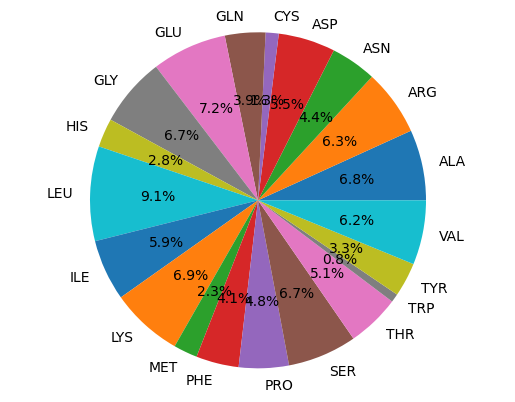

In [5]:
protein_aminoacids = {}

for key, v in proteinAminoacids.items():
  res = Counter(v.values())
  protein_aminoacids[key] = res

plot_protein_aminoacides_data = []

for key, values in proteinChainsAlpha.items():
  plot_protein_aminoacides_data.append(
      [
          key,
          protein_aminoacids[key]['ALA'],
          protein_aminoacids[key]['ARG'],
          protein_aminoacids[key]['ASN'],
          protein_aminoacids[key]['ASP'],
          protein_aminoacids[key]['CYS'],
          protein_aminoacids[key]['GLN'],
          protein_aminoacids[key]['GLU'],
          protein_aminoacids[key]['GLY'],
          protein_aminoacids[key]['HIS'],
          protein_aminoacids[key]['LEU'],
          protein_aminoacids[key]['ILE'],
          protein_aminoacids[key]['LYS'],
          protein_aminoacids[key]['MET'],
          protein_aminoacids[key]['PHE'],
          protein_aminoacids[key]['PRO'],
          protein_aminoacids[key]['SER'],
          protein_aminoacids[key]['THR'],
          protein_aminoacids[key]['TRP'],
          protein_aminoacids[key]['TYR'],
          protein_aminoacids[key]['VAL'],
      ]
  )


protein_aminoacides_df = pd.DataFrame (
    plot_protein_aminoacides_data,
    columns = [
        'Structure',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL',
    ]
)

tot_aminoacids = []
for column in aminoacids:
  tot = protein_aminoacides_df[column].sum()
  tot_aminoacids.append(tot)

fig1, ax1 = plt.subplots()
ax1.pie(tot_aminoacids,
        labels=aminoacids,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.savefig('imgs/general/aminoacid_frequency_alpha.png', bbox_inches='tight')

In [24]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

display(protein_aminoacides_df.sort_values(by=['Structure']))

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,LEU,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
615,1a4t-0,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
616,1a4t-1,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
617,1a4t-2,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
618,1a4t-3,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
619,1a4t-4,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
530,1aud-0,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5
531,1aud-1,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5
532,1aud-2,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5
533,1aud-3,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5
534,1aud-4,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5


In [21]:
protein_aminoacides_df['Structure'].unique()

array(['2l5d-0', '2l5d-1', '2l5d-2', '2l5d-3', '2l5d-4', '6h5q-0',
       '6h5q-1', '6h5q-2', '6h5q-3', '6h5q-4', '6ajk-0', '6ajk-1',
       '6ajk-2', '6ajk-3', '6ajk-4', '3tup-0', '3tup-1', '3tup-2',
       '3tup-3', '3tup-4', '5uzz-0', '5uzz-1', '5uzz-2', '5uzz-3',
       '5uzz-4', '6mcf-0', '6mcf-1', '6mcf-2', '6mcf-3', '6mcf-4',
       '8bf8-0', '8bf8-1', '8bf8-2', '8bf8-3', '8bf8-4', '7x34-0',
       '7x34-1', '7x34-2', '7x34-3', '7x34-4', '2fy1-0', '2fy1-1',
       '2fy1-2', '2fy1-3', '2fy1-4', '2mjh-0', '2mjh-1', '2mjh-2',
       '2mjh-3', '2mjh-4', '484d-0', '484d-1', '484d-2', '484d-3',
       '484d-4', '1mnb-0', '1mnb-1', '1mnb-2', '1mnb-3', '1mnb-4',
       '2lup-0', '2lup-1', '2lup-2', '2lup-3', '2lup-4', '7zpi-0',
       '7zpi-1', '7zpi-2', '7zpi-3', '7zpi-4', '5j2w-0', '5j2w-1',
       '5j2w-2', '5j2w-3', '5j2w-4', '2kx5-0', '2kx5-1', '2kx5-2',
       '2kx5-3', '2kx5-4', '1hji-0', '1hji-1', '1hji-2', '1hji-3',
       '1hji-4', '7oi3-0', '7oi3-1', '7oi3-2', '7oi3-3', '7oi3

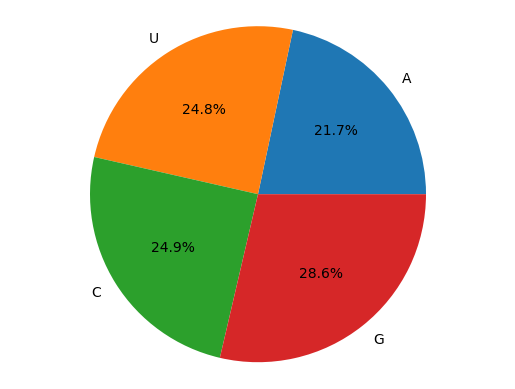

In [6]:
rna_nucleotides = {}

for key, v in RNANucleotides.items():
  res = Counter(v.values())
  rna_nucleotides[key] = res

plot_rna_nucleotides_data = []

for key, values in RNAChainsAlpha.items():
  plot_rna_nucleotides_data.append(
      [
          key,
          rna_nucleotides[key]['A'],
          rna_nucleotides[key]['U'],
          rna_nucleotides[key]['C'],
          rna_nucleotides[key]['G'],
      ]
  )

rna_nucleotides_df = pd.DataFrame (
    plot_rna_nucleotides_data,
    columns = [
        'Structure',
        'A',
        'U',
        'C',
        'G',
    ]
)

tot_nucleotides = []
for column in nucleotides:
  tot = rna_nucleotides_df[column].sum()
  tot_nucleotides.append(tot)

fig1, ax1 = plt.subplots()
ax1.pie(tot_nucleotides,
        labels=nucleotides,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.savefig('imgs/general/nucleotides_frequency_alpha.png', bbox_inches='tight')

In [7]:
interactionsAlpha = {}
all_interactions = []

for key, values in proteinChainsAlpha.items():
  d = distMap(proteinChainsAlpha[key], RNAChainsAlpha[key])
  interactionsAlpha[key] = d

  for val in d:
    all_interactions.append(val)

In [8]:
aminoacid_interaction_stats = {}

for val in all_interactions:
  aminoacid_interaction_stats[val['from']] = getList(all_interactions, val['from'])

frequency = getAminoacidFreq(aminoacid_interaction_stats)
frequency_df = mountFrequencyDf(frequency)
frequency_df.sort_values(by=['Aminoacid'])

,Aminoacid,A,U,C,G
7,ALA,8,28,15,10
4,ARG,35,70,34,23
2,ASN,23,11,9,0
18,ASP,3,0,3,2
10,GLN,5,8,4,13
16,GLU,7,4,0,0
5,GLY,52,178,75,62
15,HIS,3,7,8,11
9,ILE,6,18,0,0
0,LEU,8,1,0,9


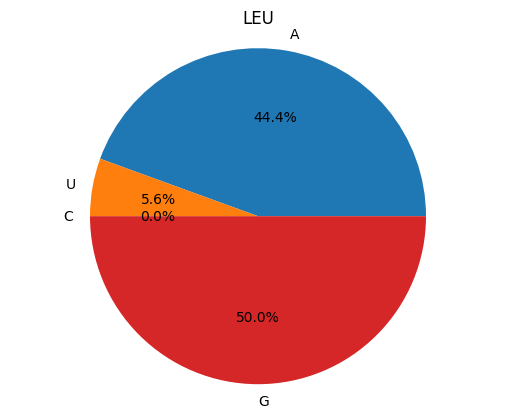

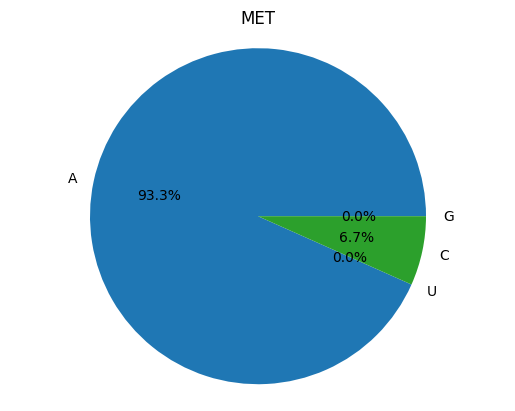

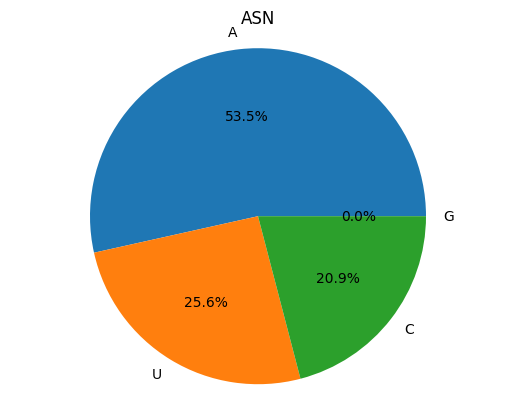

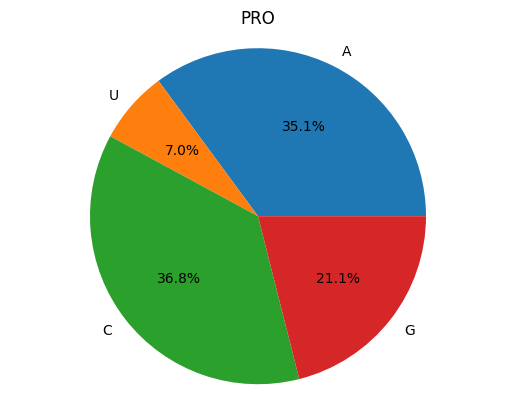

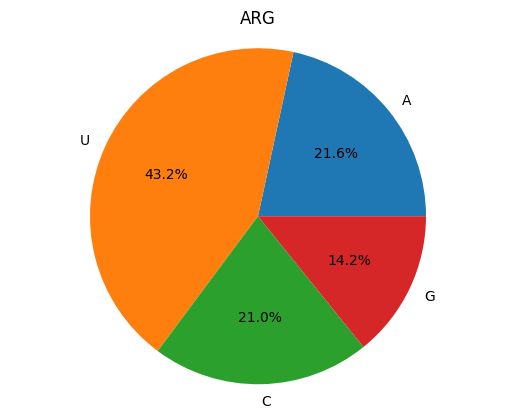

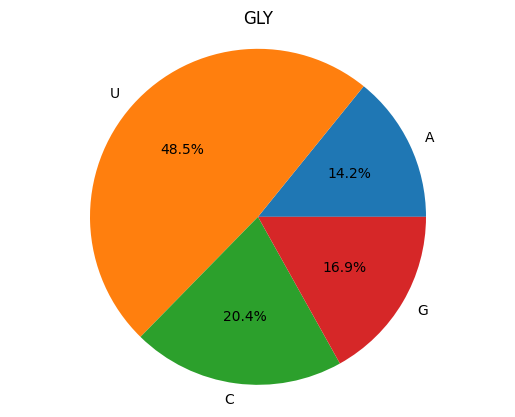

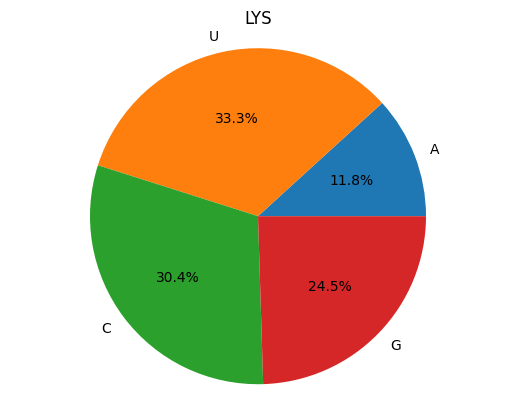

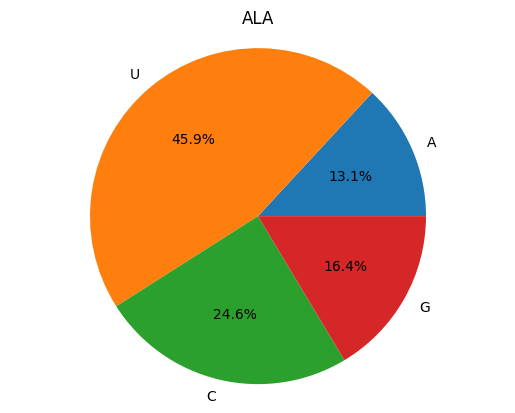

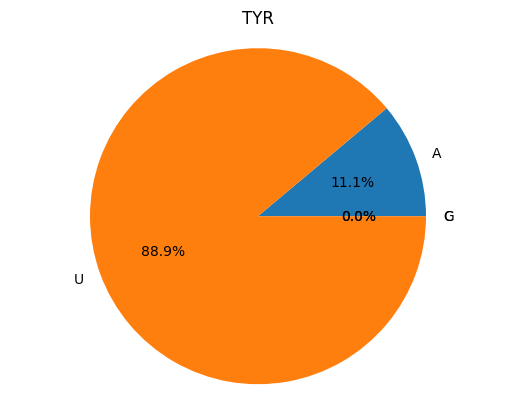

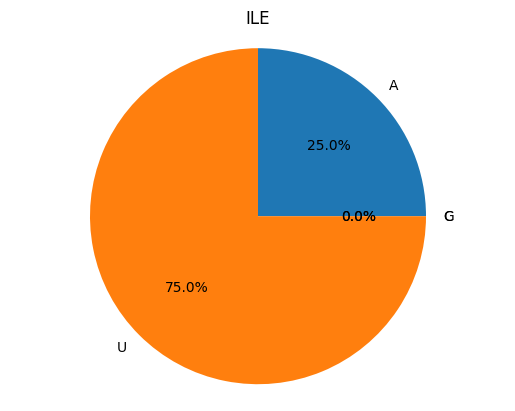

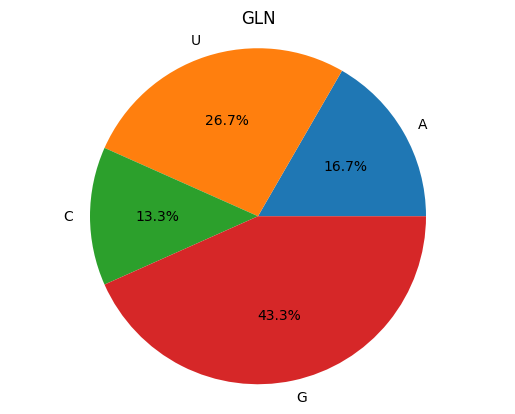

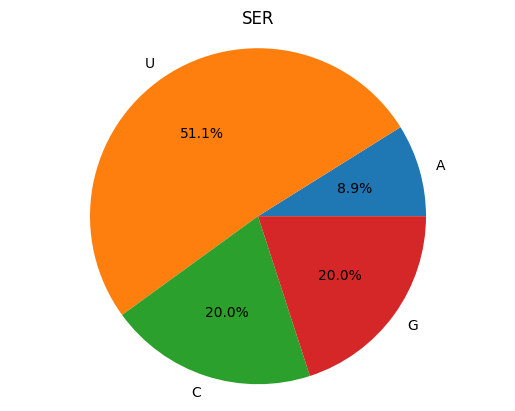

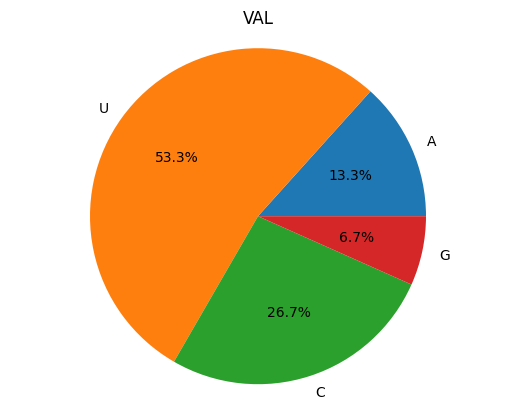

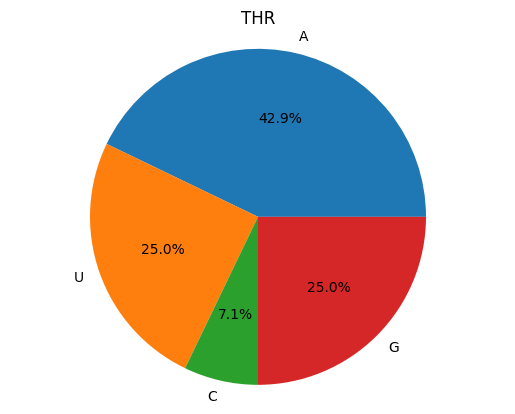

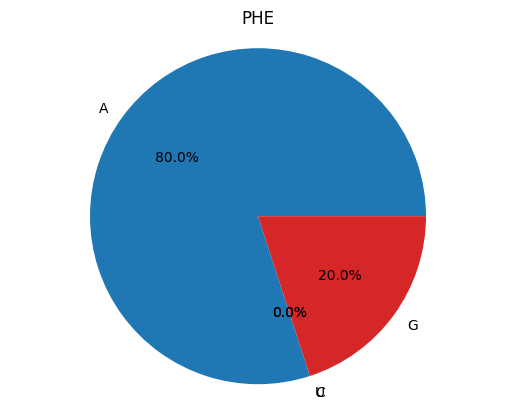

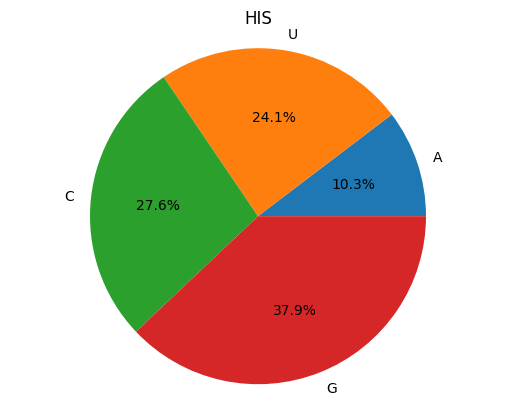

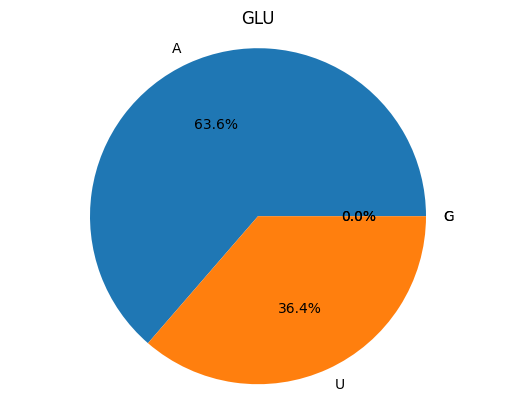

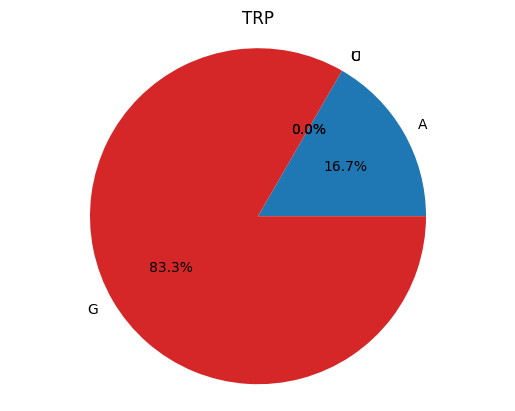

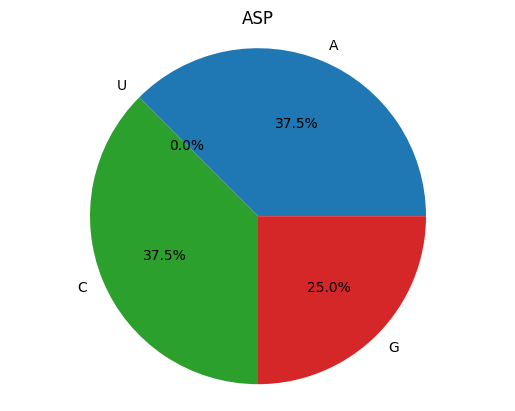

In [9]:
def plotNucleotideFrequency(frequency_df):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Aminoacid'])
    ax1.pie([
            row[nucleotides[0]],
            row[nucleotides[1]],
            row[nucleotides[2]],
            row[nucleotides[3]]
          ],
          labels=nucleotides,
          autopct='%1.1f%%')

    ax1.axis('equal')
      
    plt.savefig(f"imgs/general/db-alpha-nucleotides-frequency/{row['Aminoacid']}.png", bbox_inches='tight')
      
plotNucleotideFrequency(frequency_df)

In [10]:
nucleotides_interaction_stats = {}

for val in all_interactions:
  nucleotides_interaction_stats[val['to']] = getListNumclAmin(all_interactions, val['to'])

frequencyNumclAmin = getNucleotideFreq(nucleotides_interaction_stats)
frequency_df = mountNucleotideFrequencyDf(frequencyNumclAmin)
frequency_df.sort_values(by=['Nucleotide'])

,Nucleotide,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,A,8,35,23,3,0,5,7,52,3,...,6,12,14,4,20,4,12,1,2,2
2,C,15,34,9,3,0,4,0,75,8,...,0,31,1,0,21,9,2,0,0,4
3,G,10,23,0,2,0,13,0,62,11,...,0,25,0,1,12,9,7,5,0,1
1,U,28,70,11,0,0,8,4,178,7,...,18,34,0,0,4,23,7,0,16,8


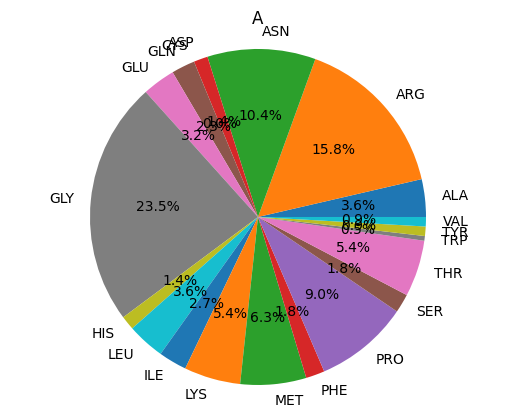

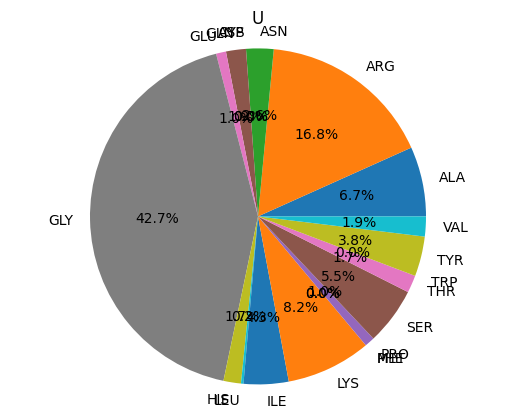

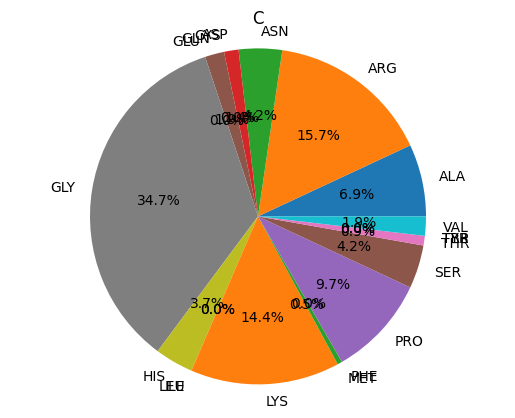

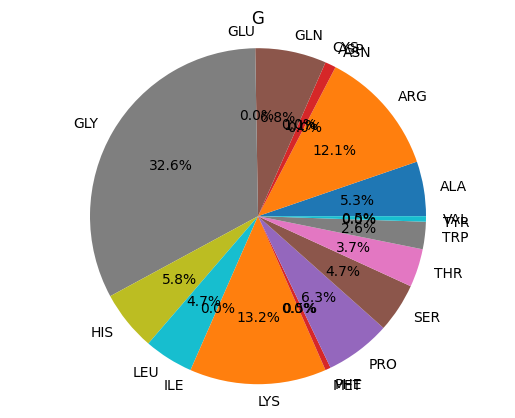

In [11]:
def plotNucleotideFreq(frequency_df, img_dir = 'db-aminoacids-frequency'):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Nucleotide'])
    ax1.pie([
            row[aminoacids[0]],
            row[aminoacids[1]],
            row[aminoacids[2]],
            row[aminoacids[3]],
            row[aminoacids[4]],
            row[aminoacids[5]],
            row[aminoacids[6]],
            row[aminoacids[7]],
            row[aminoacids[8]],
            row[aminoacids[9]],
            row[aminoacids[10]],
            row[aminoacids[11]],
            row[aminoacids[12]],
            row[aminoacids[13]],
            row[aminoacids[14]],
            row[aminoacids[15]],
            row[aminoacids[16]],
            row[aminoacids[17]],
            row[aminoacids[18]],
            row[aminoacids[19]]
          ],
          labels=aminoacids,
          autopct='%1.1f%%')

    ax1.axis('equal')
        
    plt.savefig(f"imgs/general/db-alpha-aminoacids-frequency/{row['Nucleotide']}.png", bbox_inches='tight')

plotNucleotideFreq(frequency_df)

In [12]:
def plotHeatMap(df, file_dir):
    ax = sns.heatmap(df, annot=True, fmt="g", xticklabels=True, yticklabels=True)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)

    plt.savefig(file_dir)
    plt.clf()

In [13]:
for aminoacid, interactions in interactionsAlpha.items():
    if interactions:
        df = pd.DataFrame(0, aminoacids, columns=nucleotides)
        aminoacid_name = aminoacid.split('-')
        
        for interaction in interactions:
            df.loc[interaction['from'],interaction['to']] = df.loc[interaction['from'],interaction['to']] + 1

        file_dir = f"imgs/db-alpha/{aminoacid_name[0]}"
        if not os.path.exists(file_dir):
            os.makedirs(file_dir)
        
        plotHeatMap(df, f"{file_dir}/{aminoacid_name[1]}.png")

<Figure size 640x480 with 0 Axes>

In [25]:
pdb_relation_df = pd.read_csv('Number of Aminoacids PDB Structures.csv')
pdb_relation_df

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,LEU,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,1a4t,2,6,1,1,0,0,2,0,1,1,1,2,0,0,0,0,2,0,0,0
1,1aud,7,6,5,5,0,4,4,4,2,7,10,11,4,7,4,8,5,0,3,5
2,1biv,0,7,0,0,0,0,0,4,0,0,1,1,0,0,2,1,1,0,0,0
3,1d6k,11,6,3,5,0,5,7,5,3,5,7,11,3,4,4,2,2,0,3,8
4,1ekz,4,3,3,2,1,2,8,7,3,4,6,11,4,2,2,4,3,0,0,7
5,1etf,5,11,1,1,0,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0
6,1etg,5,11,1,1,0,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0
7,1exy,0,7,0,0,0,1,0,0,0,0,0,2,1,0,3,1,1,0,0,0
8,1fje,14,7,10,10,0,2,22,14,1,18,8,19,1,9,3,13,8,0,4,12
9,1fnx,11,8,11,10,1,10,8,14,0,15,14,14,4,7,7,16,10,0,6,8


In [52]:
missing = []

for index, row in pdb_relation_df.iterrows():
    for num in range(0, 5):
        structure = protein_aminoacides_df.loc[protein_aminoacides_df['Structure'] == f"{row['Structure']}-{num}"]
        for aminoacid in aminoacids:
            if (not structure.empty) & (structure[aminoacid].item() != row[aminoacid]):
                missing.append(row['Structure'])

ValueError: can only convert an array of size 1 to a Python scalar

In [75]:
unique_values = list(set(missing))
unique_values.sort()

print(len(unique_values))
unique_values

67


['1g70',
 '1gsg',
 '1k1g',
 '1ls2',
 '1r2w',
 '1r2x',
 '1x1l',
 '2ad9',
 '2adb',
 '2b6g',
 '2err',
 '2ese',
 '2fy1',
 '2kdq',
 '2kfy',
 '2kg0',
 '2kg1',
 '2kh9',
 '2kx5',
 '2kxn',
 '2leb',
 '2lec',
 '2rs2',
 '2vaz',
 '2xfm',
 '2yh1',
 '3moj',
 '3qjp',
 '3qrr',
 '3rc8',
 '3tup',
 '4lmz',
 '4nha',
 '4uft',
 '4wc3',
 '4x0a',
 '4x0b',
 '5bym',
 '5fn1',
 '5j0m',
 '5j1o',
 '5j2w',
 '5uzz',
 '6ajk',
 '6d2u',
 '6du5',
 '6h5q',
 '6h5s',
 '6hpj',
 '6m7d',
 '6r9j',
 '6r9m',
 '6r9o',
 '6r9p',
 '6r9q',
 '6tph',
 '7act',
 '7ewq',
 '7kjt',
 '7og6',
 '7oi3',
 '7ozr',
 '7ypw',
 '7yyn',
 '7zpi',
 '8acc',
 '8bf8']

In [42]:
pdb_relation_df.loc[pdb_relation_df['Structure'] == '1g70']

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,LEU,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
10,1g70,5,6,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0,0,0,0


In [43]:
protein_aminoacides_df.loc[protein_aminoacides_df['Structure'] == '1g70-0']

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,LEU,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
210,1g70-0,5,10,0,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0
